# <center> Assignment 3 </center>

#### Name: Janelle Tait

#### Student ID: 180447860

Given a train set and a test set (without label), the following code implements a neural network model. You may refer to the keras menu: https://keras.io. Please submit the folling in one zip file: (1) Figure for Q1 , (2)code for Q2, (3) result 'pred.csv' for Q2, (4) Figure for Q2. 

### Q1. Draw the structure of the model on a paper. Show clearly the number of layers, and the type of each layer and the specs.

### Q2. Use the training set to tune the model. (You may split the train set into train-valid sets.) To tune the model, you many add/remove layers, set different parameters. 

#### (a)  Your prediction 'pred.csv' will be evaluated by classification accuracy. The accuracy will be compared across your classmates. A higher ranked prediction accuracy will get more scores.
#### (b) Draw the structure of your new model on the paper, and illustrate the difference you have made compared to the given model.

In [1]:
#!python3 -m pip install tensorflow-cpu
#!conda install python-graphviz --yes
#!pip install -q -U keras-tuner
#!pip install pydot


#!conda install pydot --yes
#!conda install pydotplus --yes

import graphviz
import pydot
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import keras_tuner as kt
from keras import utils as np_utils
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from matplotlib import pyplot as plt


In [2]:
digits = pd.read_csv("train.csv")
digitsTest = pd.read_csv("test_nolabel.csv")

digits.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


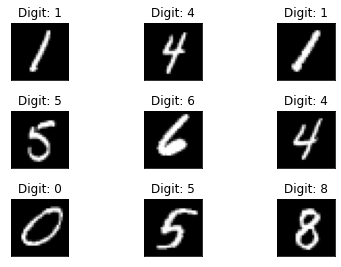

In [3]:
train = digits.values[:,1:]
trainLabels_raw = digits.values[:,0]
test = digitsTest.values[:,:]

## View the top entries as images
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(train[i].reshape(28,-1),cmap="gray")
    plt.title("Digit: {}".format(trainLabels_raw[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()
plt.close()

In [4]:
# The size of the data
train.shape, trainLabels_raw.shape, test.shape

((6000, 784), (6000,), (1000, 784))

In [5]:
train = train.astype("float32")
train/=255.0
num_categories = 10
trainLabels = keras.utils.np_utils.to_categorical(trainLabels_raw,num_categories)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation = "relu", input_shape = (28,28,1)
))
model.add(Conv2D(64,(3,3),activation="relu"))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(num_categories, activation = "softmax"))


#Complie the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.009),
              metrics=['accuracy'])

# Train the model
batch_size = 150
num_epoch = 3
model_log = model.fit(train.reshape(-1,28,28,1), trainLabels, validation_split = 0.2,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          )

dot_img_file = 'model2_post_training.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True, show_dtype = True, show_layer_names = True)

## Predict the model
ypred = model.predict(test.reshape(-1,28,28,1))
np.savetxt("pred.csv", ypred, delimiter=",")

2021-12-02 19:31:02.914730: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/3
32/32 [==============================] - 17s 510ms/step - loss: 0.6625 - accuracy: 0.8021 - val_loss: 0.2115 - val_accuracy: 0.9442
Epoch 2/3
32/32 [==============================] - 16s 503ms/step - loss: 0.1179 - accuracy: 0.9635 - val_loss: 0.1432 - val_accuracy: 0.9583
Epoch 3/3
32/32 [==============================] - 16s 497ms/step - loss: 0.0489 - accuracy: 0.9854 - val_loss: 0.1833 - val_accuracy: 0.9583


In [6]:
# convert output to numbers and store to csv
ypred_num = []
for y in ypred:
    for i in range(10):
        if y[i] == 1:
            ypred_num.append(i)

with open('pred.csv', 'w') as file:
    for n in ypred_num:
        file.write("%i\n" % n)